In [1]:
import scanpy as sc
import numpy as np

adata_spatial_anterior = sc.datasets.visium_sge(
    sample_id="V1_Mouse_Brain_Sagittal_Anterior"
)
adata_spatial_posterior = sc.datasets.visium_sge(
    sample_id="V1_Mouse_Brain_Sagittal_Posterior"
)

/home/risitop/.local/share/virtualenvs/transmorph_local-RhkhmxdW/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/risitop/.local/share/virtualenvs/transmorph_local-RhkhmxdW/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [2]:
def preprocess(adata):
    adata.var_names_make_unique()
    adata.obs_names_make_unique()
    if not isinstance(adata.X, np.ndarray):
        adata.X = adata.X.toarray()
    sc.pp.log1p(adata)
    sc.pp.highly_variable_genes(adata)
    
preprocess(adata_spatial_anterior)
preprocess(adata_spatial_posterior)

In [34]:
from transmorph.engine import Model
from transmorph.engine.layers import (
    LayerInput,
    LayerOutput,
    LayerTransformation,
    LayerMatching,
    LayerMerging
)
from transmorph.engine.transforming import PCA, CommonFeatures
from transmorph.engine.matching import FusedGW
from transmorph.engine.merging import GraphEmbedding

linput = LayerInput()
ltrans = LayerTransformation()
lmatch = LayerMatching(FusedGW(alpha=.9))
lmerge = LayerMerging(GraphEmbedding())
lout = LayerOutput()

ltrans.add_transformation(CommonFeatures())
ltrans.add_transformation(PCA(n_components=50))

linput.connect(ltrans)
ltrans.connect(lmatch)
lmatch.connect(lmerge)
lmerge.connect(lout)

model = Model(linput)

DEBUG:transmorph._logging:LAYER_INPUT#5 > Initialized.
DEBUG:transmorph._logging:LAYER_TRANSFORMATION#6 > Initialized.
DEBUG:transmorph._logging:LAYER_MATCHING#7 > Initialized.
DEBUG:transmorph._logging:LAYER_MERGING#8 > Initialized.
DEBUG:transmorph._logging:LAYER_OUTPUT#9 > Initialized.
DEBUG:transmorph._logging:LAYER_INPUT#5 > Connected to layer LAYER_TRANSFORMATION#6.
DEBUG:transmorph._logging:LAYER_INPUT#5 > LAYER_INPUT#5 chosen as default embedding reference for LAYER_TRANSFORMATION#6.
DEBUG:transmorph._logging:LAYER_TRANSFORMATION#6 > Connected to layer LAYER_MATCHING#7.
DEBUG:transmorph._logging:LAYER_TRANSFORMATION#6 > LAYER_TRANSFORMATION#6 chosen as default embedding reference for LAYER_MATCHING#7.
DEBUG:transmorph._logging:LAYER_MATCHING#7 > Connected to layer LAYER_MERGING#8.
DEBUG:transmorph._logging:LAYER_MATCHING#7 > LAYER_TRANSFORMATION#6 chosen as default embedding reference for LAYER_MERGING#8.
DEBUG:transmorph._logging:LAYER_MERGING#8 > Connected to layer LAYER_OUTP

In [36]:
model.fit([adata_spatial_anterior, adata_spatial_posterior])

CUSTOM_MODEL > Transmorph model is initializing.


INFO:transmorph._logging:CUSTOM_MODEL > Transmorph model is initializing.
DEBUG:transmorph._logging:CUSTOM_MODEL > Flagging dataset 0 as reference: False.
DEBUG:transmorph._logging:CUSTOM_MODEL > Flagging dataset 1 as reference: False.
DEBUG:transmorph._logging:CUSTOM_MODEL > Precomputing neighbors graph.
DEBUG:transmorph._logging:nearest_neighbors > Computing PCA 32285 -> 15
DEBUG:transmorph._logging:nearest_neighbors > Computing nearest neighbors using sklearn.
DEBUG:transmorph._logging:nearest_neighbors > n: 2695, kmin: 50, kmax: 50
DEBUG:transmorph._logging:nearest_neighbors > Computing PCA 32285 -> 15
DEBUG:transmorph._logging:nearest_neighbors > Computing nearest neighbors using sklearn.
DEBUG:transmorph._logging:nearest_neighbors > n: 3355, kmin: 50, kmax: 50


CUSTOM_MODEL > Ready to start the integration of 2 datasets, 6050 total samples.


INFO:transmorph._logging:CUSTOM_MODEL > Ready to start the integration of 2 datasets, 6050 total samples.


CUSTOM_MODEL > Running layer LAYER_INPUT#5.


INFO:transmorph._logging:CUSTOM_MODEL > Running layer LAYER_INPUT#5.
DEBUG:transmorph._logging:LAYER_INPUT#5 > Checking if all representations are present.
DEBUG:transmorph._logging:LAYER_INPUT#5 > All representations found, in feature space: True.


CUSTOM_MODEL > Running layer LAYER_TRANSFORMATION#6.


INFO:transmorph._logging:CUSTOM_MODEL > Running layer LAYER_TRANSFORMATION#6.
DEBUG:transmorph._logging:LAYER_TRANSFORMATION#6 > Retrieving data from AnnDataKeyIdentifiers.BaseRepresentation.
DEBUG:transmorph._logging:LAYER_TRANSFORMATION#6 > Beginning of transform(). Is feature space: True
DEBUG:transmorph._logging:LAYER_TRANSFORMATION#6 > Running transformation TRANSFORMATION_COMMON_FEATURES
DEBUG:transmorph._logging:LAYER_TRANSFORMATION#6 > Initial spaces dimension: [(2695, 32285), (3355, 32285)]
DEBUG:transmorph._logging:LAYER_TRANSFORMATION#6 > Final spaces dimension: [(2695, 32285), (3355, 32285)]
DEBUG:transmorph._logging:LAYER_TRANSFORMATION#6 > Is feature space: False
DEBUG:transmorph._logging:LAYER_TRANSFORMATION#6 > Running transformation TRANSFORMATION_PCA
DEBUG:transmorph._logging:LAYER_TRANSFORMATION#6 > Initial spaces dimension: [(2695, 32285), (3355, 32285)]
DEBUG:transmorph._logging:LAYER_TRANSFORMATION#6 > Final spaces dimension: [(2695, 50), (3355, 50)]
DEBUG:transmo

CUSTOM_MODEL > Running layer LAYER_MATCHING#7.


INFO:transmorph._logging:CUSTOM_MODEL > Running layer LAYER_MATCHING#7.
DEBUG:transmorph._logging:LAYER_MATCHING#7 > Retrieving data from LAYER_TRANSFORMATION#6_6.
DEBUG:transmorph._logging:LAYER_MATCHING#7 > Beginning of transform(). Is feature space: False


LAYER_MATCHING#7 > Calling matching MATCHING_FUSEDGW.


INFO:transmorph._logging:LAYER_MATCHING#7 > Calling matching MATCHING_FUSEDGW.
RESULT MIGHT BE INACURATE
Max number of iteration reached, currently 100000. Sometimes iterations go on in cycle even though the solution has been reached, to check if it's the case here have a look at the minimal reduced cost. If it is very close to machine precision, you might actually have the correct solution, if not try setting the maximum number of iterations a bit higher
/home/risitop/.local/share/virtualenvs/transmorph_local-RhkhmxdW/lib/python3.9/site-packages/ot/lp/__init__.py:343: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)
RESULT MIGHT BE INACURATE
Max number of iteration reached, currently 100000. Sometimes iterations go on in cycle even though the solution has been reached, to check if it's the case here have a look at the minimal reduced cost. If it is very close to machine precision, you might actually have th

CUSTOM_MODEL > Running layer LAYER_MERGING#8.


INFO:transmorph._logging:CUSTOM_MODEL > Running layer LAYER_MERGING#8.
DEBUG:transmorph._logging:LAYER_MERGING#8 > Retrieving data from LAYER_TRANSFORMATION#6_6.
DEBUG:transmorph._logging:LAYER_MERGING#8 > Beginning of transform(). Is feature space: False


LAYER_MERGING#8 > Running merging MERGING_GRAPH_EMBEDDING...


INFO:transmorph._logging:LAYER_MERGING#8 > Running merging MERGING_GRAPH_EMBEDDING...
DEBUG:transmorph._logging:MERGING_GRAPH_EMBEDDING > Matching graph (0, 1): 4480 edges.
DEBUG:transmorph._logging:MERGING_GRAPH_EMBEDDING > min: 1.0014857707574265e-06, max: 1.0, mean: 0.6854822635650635
DEBUG:transmorph._logging:MERGING_GRAPH_EMBEDDING > Matching graph (1, 0): 5051 edges.
DEBUG:transmorph._logging:MERGING_GRAPH_EMBEDDING > min: 1.0023877621279098e-06, max: 1.0, mean: 0.7483596801757812
DEBUG:transmorph._logging:MERGING_GRAPH_EMBEDDING > Internal graph 0: 26947 edges.
DEBUG:transmorph._logging:MERGING_GRAPH_EMBEDDING > min: 1.1107008504041005e-06, max: 1.0, mean: 0.3322298228740692
DEBUG:transmorph._logging:MERGING_GRAPH_EMBEDDING > Internal graph 1: 33527 edges.
DEBUG:transmorph._logging:MERGING_GRAPH_EMBEDDING > min: 1.2437649274943396e-06, max: 1.0, mean: 0.33242067694664
DEBUG:transmorph._logging:MERGING_GRAPH_EMBEDDING > Embedding a graph of 81408 edges in 2 dimensions.
DEBUG:tran

CUSTOM_MODEL > Running layer LAYER_OUTPUT#9.


INFO:transmorph._logging:CUSTOM_MODEL > Running layer LAYER_OUTPUT#9.
DEBUG:transmorph._logging:LAYER_OUTPUT#9 > Retrieving data from LAYER_MERGING#8_8.
DEBUG:transmorph._logging:ADManager > Inserting <class 'numpy.ndarray'> ((2695, 2)) in obsm[transmorph]
DEBUG:transmorph._logging:ADManager > Inserting <class 'numpy.ndarray'> ((3355, 2)) in obsm[transmorph]
DEBUG:transmorph._logging:ADManager > Deleting entry uns[tr_adata_id].
DEBUG:transmorph._logging:ADManager > Deleting entry obsm[LAYER_TRANSFORMATION#1_1].
DEBUG:transmorph._logging:ADManager > Deleting entry obsm[LAYER_MERGING#3_3].
DEBUG:transmorph._logging:ADManager > Deleting entry obsm[LAYER_TRANSFORMATION#6_6].
DEBUG:transmorph._logging:ADManager > Deleting entry obsm[LAYER_MERGING#8_8].
DEBUG:transmorph._logging:ADManager > Deleting entry uns[tr_adata_id].
DEBUG:transmorph._logging:ADManager > Deleting entry obsm[LAYER_TRANSFORMATION#1_1].
DEBUG:transmorph._logging:ADManager > Deleting entry obsm[LAYER_MERGING#3_3].
DEBUG:tr

CUSTOM_MODEL > Terminated. Total embedding shape: (6050, 2)


INFO:transmorph._logging:CUSTOM_MODEL > Terminated. Total embedding shape: (6050, 2)


CUSTOM_MODEL > Results have been written in AnnData.obsm['transmorph'].


INFO:transmorph._logging:CUSTOM_MODEL > Results have been written in AnnData.obsm['transmorph'].
DEBUG:transmorph._logging:CUSTOM_MODEL > ### REPORT_START ###
Total time: 1390.2669672966003s
Longest task: LAYER_MATCHING#7.fit [5] (140.60242819786072s)
Ended tasks: 8
Ongoing tasks: 0
Total tasks: 8
TID	NAME	ELAPSED(s)	STATE
0	LAYER_TRANSFORMATION#1.fit	5.43e+01	ended
1	LAYER_MATCHING#2.fit	6.00e+01	ended
2	MATCHING_FUSEDGW.fit	6.00e+01	ended
3	LAYER_MERGING#3.fit	7.22e+00	ended
4	LAYER_TRANSFORMATION#6.fit	5.61e+01	ended
5	LAYER_MATCHING#7.fit	1.41e+02	ended
6	MATCHING_FUSEDGW.fit	1.41e+02	ended
7	LAYER_MERGING#8.fit	5.35e+00	ended
DEBUG:transmorph._logging:CUSTOM_MODEL > ### REPORT_END ###


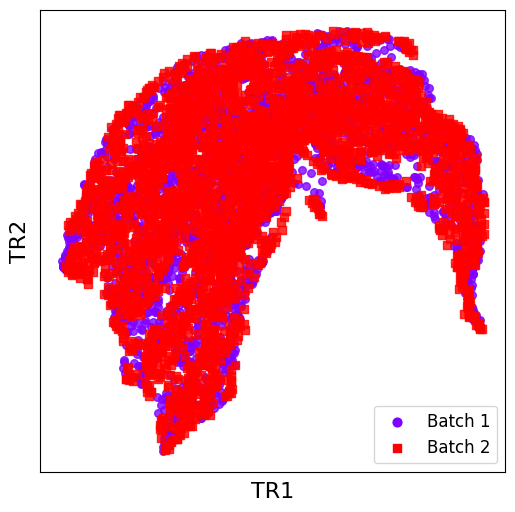

In [35]:
from transmorph.utils.plotting import scatter_plot

scatter_plot([adata_spatial_anterior, adata_spatial_posterior], input_obsm="transmorph", xlabel="TR1", ylabel="TR2")

In [30]:
from transmorph.utils.graph import cluster_anndatas

cluster_anndatas([adata_spatial_anterior, adata_spatial_posterior], use_rep="transmorph", resolution=.1)

DEBUG:transmorph._logging:nearest_neighbors > Computing nearest neighbors using nndescent.
DEBUG:transmorph._logging:nearest_neighbors > n: 6050, kmin: 10, kmax: 10
DEBUG:transmorph._logging:ADManager > Inserting <class 'numpy.ndarray'> ((2695,)) in obs[cluster]
DEBUG:transmorph._logging:ADManager > Inserting <class 'numpy.ndarray'> ((3355,)) in obs[cluster]


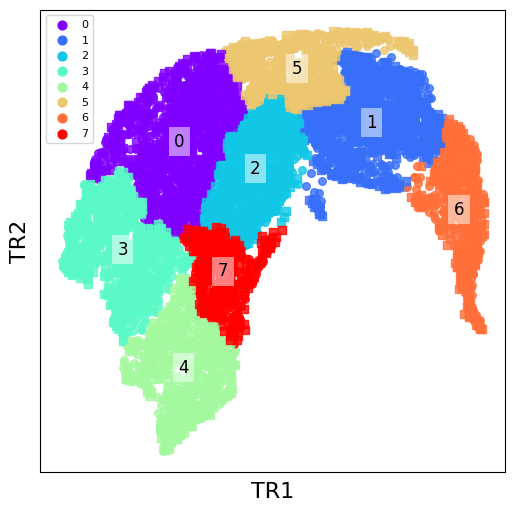

In [31]:
scatter_plot(
    [adata_spatial_anterior, adata_spatial_posterior], 
    input_obsm="transmorph", 
    xlabel="TR1", 
    ylabel="TR2",
    color_by="cluster",
    plot_cluster_names=True
)

In [32]:
from matplotlib import cm


n_clusters = 1 + max(
    max(adata_spatial_anterior.obs.cluster),
    max(adata_spatial_posterior.obs.cluster),    
)

cmap = cm.get_cmap("rainbow", n_clusters)

palette = [
    cmap(cl_int / (n_clusters - 1))
    for cl_int in range(n_clusters)
]

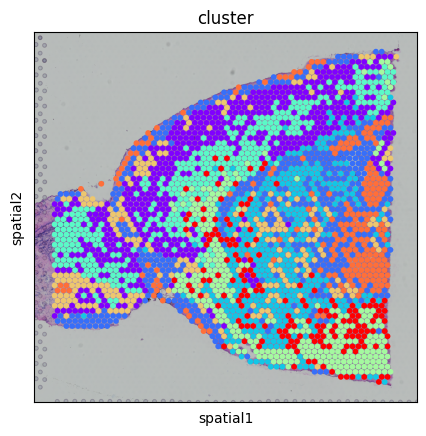

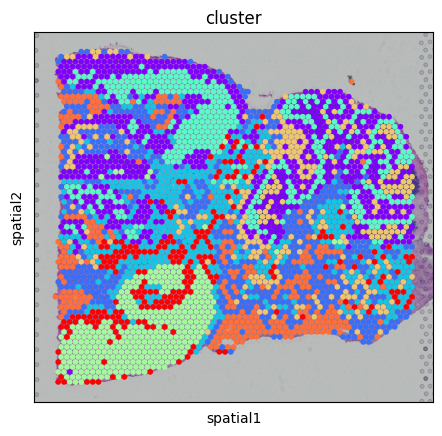

In [33]:
for i, ad in enumerate([adata_spatial_anterior, adata_spatial_posterior]):
    ad.obs["cluster"] = ad.obs["cluster"].astype(str)
    sc.pl.spatial(
            ad,
            img_key="hires",
            color="cluster",
            palette=palette,
            size=1.5,
            legend_loc=None,
            show=False,
        )

In [20]:
adata_spatial_anterior.obs

,in_tissue,array_row,array_col,cluster
AAACAAGTATCTCCCA-1,1,50,102,11
AAACACCAATAACTGC-1,1,59,19,8
AAACAGAGCGACTCCT-1,1,14,94,5
AAACAGCTTTCAGAAG-1,1,43,9,8
AAACAGGGTCTATATT-1,1,47,13,8
...,...,...,...,...
TTGTGTTTCCCGAAAG-1,1,51,59,1
TTGTTCAGTGTGCTAC-1,1,24,64,8
TTGTTGTGTGTCAAGA-1,1,31,77,2
TTGTTTCACATCCAGG-1,1,58,42,11
